# 7章 ニューラルネットワーク

例7-1 ReLU関数をプロットする例

In [ ]:
from sympy import *

# ReLUをプロットする
x = symbols('x')
relu = Max(0, x)
relu

Max(0, x)

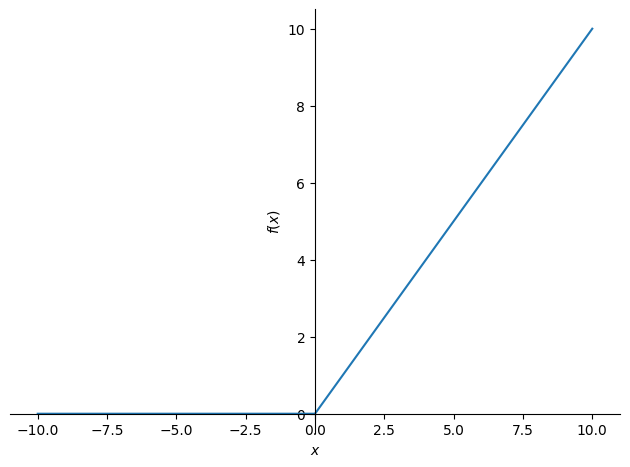

In [ ]:
plot(relu);

例7-2 SymPyでロジスティック関数をプロットする例

In [ ]:
from sympy import *

# ロジスティック（シグモイド）関数
x = symbols('x')
logistic = 1 / (1 + exp(-x))
logistic

1/(1 + exp(-x))

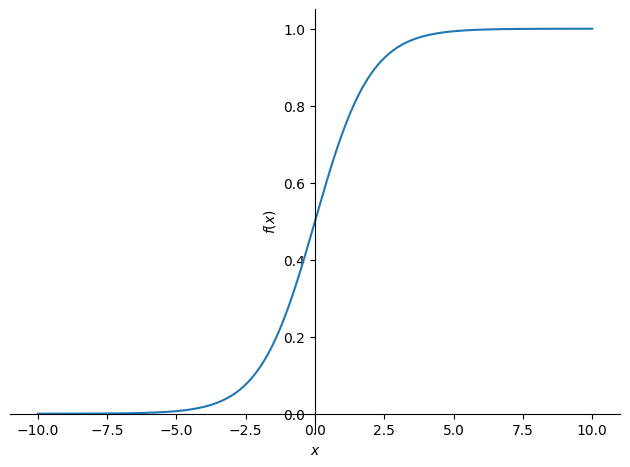

In [ ]:
plot(logistic);

例7-3 シンプルな順伝播型ネットワークの例（重みと偏りはランダム）

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv("https://tinyurl.com/y2qmhfsr")

# 入力列を抽出し、その値を255で割りスケールダウンする
all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, -1].values

# 訓練用データセットとテスト用データセットに分割する
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs,
    test_size=1/3)
n = X_train.shape[0] # 訓練用データの件数

# 重みと偏りをランダムな値で初期化してニューラルネットワークを構築する
w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)

b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

# 活性化関数を定義する
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# 入力をニューラルネットワークに渡し、予測結果を得る
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# 精度を求める
test_predictions = forward_prop(X_test.transpose())[3] # 出力層A2の値のみを取り出す
test_comparisons = np.equal((test_predictions >= 0.5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("ACCURACY: ", accuracy)

ACCURACY:  0.6080178173719369


In [ ]:
import pandas as pd

# test_predictionsを1次元配列に変換
test_predictions_flat = test_predictions.flatten()
# DataFrameを作成
df = pd.DataFrame({'test_predictions': test_predictions_flat, 'test_comparisons': test_comparisons})
display(df)

,test_predictions,test_comparisons
0,0.955521,True
1,0.935397,True
2,0.881214,False
3,0.939336,True
4,0.916488,True
...,...,...
444,0.962580,True
445,0.927239,True
446,0.939683,True
447,0.829900,False


例7-7 コスト関数の$A_2$に関する微分を求める例

In [ ]:
from sympy import *

A2, y = symbols('A2 Y')
C = (A2 - y)**2
C


(A2 - Y)**2

In [ ]:
dC_dA2 = diff(C, A2)
dC_dA2

2*A2 - 2*Y

例7-8 $Z_2$に関する$A_2$の微分を求める例

In [ ]:
from sympy import *

Z2 = symbols('Z2')

logistic = lambda x: 1 / (1 + exp(-x))

A2 = logistic(Z2)
A2

1/(1 + exp(-Z2))

In [ ]:
dA2_dZ2 = diff(A2, Z2)
dA2_dZ2

exp(-Z2)/(1 + exp(-Z2))**2

例7-9 $W_2$に関する$Z_2$の微分を求める例

In [ ]:
from sympy import *

A1, W2, B2 = symbols('A1, W2, B2')

Z2 = A1*W2 + B2
Z2

A1*W2 + B2

In [ ]:
dZ2_dW2 = diff(Z2, W2)
dZ2_dW2

A1

例7-10 ニューラルネットワークに必要な他の偏微分をすべて求める例

In [ ]:
from sympy import *

W1, W2, B1, B2, A1, A2, Z1, Z2, X, Y = \
    symbols('W1 W2 B1 B2 A1 A2 Z1 Z2 X Y')

# A2に関するコスト関数の微分を求める
C = (A2 - Y)**2
C

(A2 - Y)**2

In [ ]:
dC_dA2 = diff(C, A2)
dC_dA2

2*A2 - 2*Y

In [ ]:
# Z2に関するA2の微分を求める
logistic = lambda x: 1 / (1 + exp(-x))
_A2 = logistic(Z2)
_A2

1/(1 + exp(-Z2))

In [ ]:
dA2_dZ2 = diff(_A2, Z2)
dA2_dZ2

exp(-Z2)/(1 + exp(-Z2))**2

In [ ]:
# A1に関するZ2の微分を求める
_Z2 = A1*W2 + B2
_Z2

A1*W2 + B2

In [ ]:
dZ2_dA1 = diff(_Z2, A1)
dZ2_dA1

W2

In [ ]:
# W2に関するZ2の微分を求める
dZ2_dW2 = diff(_Z2, W2)
dZ2_dW2

A1

In [ ]:
# B2に関するZ2の微分を求める
dZ2_dB2 = diff(_Z2, B2)
dZ2_dB2

1

In [ ]:
# Z1に関するA1の微分を求める
relu = lambda x: Max(x, 0)
_A1 = relu(Z1)
d_relu = lambda x: x > 0 # 正の場合は1、負の場合は0
dA1_dZ1 = d_relu(Z1)
dA1_dZ1

Z1 > 0

In [ ]:
# W1に関するZ1の微分を求める
_Z1 = X*W1 + B1
dZ1_dW1 = diff(_Z1, W1)
dZ1_dW1

X

In [ ]:
# B1に関するZ1の微分を求める
dZ1_dB1 = diff(_Z1, B1)
dZ1_dB1

1

例7-11 確率的勾配降下法を使ったニューラルネットワークの実装例

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv("https://tinyurl.com/y2qmhfsr")

# 学習率によって解に収束する速さを制御する
# 値が小さ過ぎると、計算に時間がかかるが、値が大き過ぎると精度が低下することがある
L = 0.05

# 入力列を抽出し、その値を255で割りスケールダウンする
all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, -1].values

# 訓練用データセットとテスト用データセットに分割する
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs,
    test_size=1 / 3)
n = X_train.shape[0]


# 重みと偏りをランダムな値で初期化してニューラルネットワークを構築する
w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)

b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

# 活性化関数を定義する
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# 入力をニューラルネットワークに渡し、予測結果を得る
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# 活性化関数の導関数を定義する
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# 連鎖律を使って重みと偏りの勾配を求める
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# 勾配降下法を実行する
for i in range(100_000):
    # 訓練データの中からランダムに1件を選択
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # ランダムに選択した訓練データをニューラルネットワークに渡す
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # 誤差を逆伝播させて重みと傾きの勾配（傾き）を求める
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # 重みと偏りを更新する
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

# 精度を求める
test_predictions = forward_prop(X_test.transpose())[3]  # 出力層A2の値のみを取り出す
test_comparisons = np.equal((test_predictions >= 0.5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("ACCURACY: ", accuracy)

ACCURACY:  0.9910913140311729


In [ ]:
# test_predictionsを1次元配列に変換
test_predictions_flat = test_predictions.flatten()
# DataFrameを作成
df = pd.DataFrame({'test_predictions': test_predictions_flat, 'test_comparisons': test_comparisons})
display(df)

,test_predictions,test_comparisons
0,1.000000,True
1,1.000000,True
2,1.000000,True
3,1.000000,True
4,0.005304,True
...,...,...
444,0.005304,True
445,0.005304,True
446,0.005304,True
447,0.005304,True


例7-12 ニューラルネットワークに対話型シェルを追加する例

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv("https://tinyurl.com/y2qmhfsr")

# 学習率によって解に収束する速さを制御する
# 値が小さ過ぎると、計算に時間がかかるが、値が大き過ぎると精度が低下することがある
L = 0.05

# 入力列を抽出し、その値を255で割りスケールダウンする
all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, -1].values

# 訓練用データセットとテスト用データセットに分割する
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs,
    test_size=1 / 3)
n = X_train.shape[0]


# 重みと偏りをランダムな値で初期化してニューラルネットワークを構築する
w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)

b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

# 活性化関数を定義する
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# 入力をニューラルネットワークに渡し、予測結果を得る
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# 活性化関数の導関数を定義する
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# 連鎖律を使って重みと偏りの勾配を求める
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# 勾配降下法を実行する
for i in range(100_000):
    # 訓練データの中からランダムに1件を選択
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # ランダムに選択した訓練データをニューラルネットワークに渡す
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # 誤差を逆伝播させて重みと傾きの勾配（傾き）を求める
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # 重みと偏りを更新する
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

# 精度を求める
test_predictions = forward_prop(X_test.transpose())[3]  # 出力層A2の値のみを取り出す
test_comparisons = np.equal((test_predictions >= 0.5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("ACCURACY: ", accuracy)

ACCURACY:  0.9977728285077875


In [ ]:
# test_predictionsを1次元配列に変換
test_predictions_flat = test_predictions.flatten()
# DataFrameを作成
df = pd.DataFrame({'test_predictions': test_predictions_flat, 'test_comparisons': test_comparisons})
display(df)

,test_predictions,test_comparisons
0,0.008153,True
1,1.000000,True
2,0.999999,True
3,1.000000,True
4,1.000000,True
...,...,...
444,0.999999,True
445,1.000000,True
446,0.884621,True
447,1.000000,True


In [ ]:
# 対話形式で指定した色に対して評価する
def predict_probability(r, g, b):
    X = np.array([[r, g, b]]).transpose() / 255
    Z1, A1, Z2, A2 = forward_prop(X)
    return A2

def predict_font_shade(r, g, b):
    output_values = predict_probability(r, g, b)
    if output_values > 0.5:
        return "DARK"
    else:
        return "LIGHT"

while True:
    col_input = input("Predict light or dark font. Input values R,G,B: ")
    (r, g, b) = col_input.split(",")
    print(predict_font_shade(int(r), int(g), int(b)))

Predict light or dark font. Input values R,G,B: 0,0,0
LIGHT
Predict light or dark font. Input values R,G,B: 255,255,255
DARK


例7-13 scikit-learnを使ったニューラルネットワークの分類器の例

In [ ]:
import pandas as pd
# データを読み込む
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('https://bit.ly/3GsNzGt', delimiter=",")

# 入力変数（すべての行、最終列を除くすべての列）を抽出する
# 加えて、スケーリングも実施する
X = (df.values[:, :-1] / 255.0)

# 出力列（すべての行、最終列）を抽出する
Y = df.values[:, -1]

# 訓練用データセットとテスト用データセットに分割する
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(3, ),
                   activation='relu',
                   max_iter=100_000,
                   learning_rate_init=0.05)

nn.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(3,), learning_rate_init=0.05, max_iter=100000,
              solver='sgd')

In [ ]:
# 重みと偏りを表示する
print(nn.coefs_ )
print(nn.intercepts_)

print("Training set score: %f" % nn.score(X_train, Y_train))
print("Test set score: %f" % nn.score(X_test, Y_test))

[array([[ 0.17622756, -0.38111092,  3.54115895],
       [ 0.35839654,  0.49689986,  7.32167159],
       [-0.20876947,  0.69054823,  1.48324707]]), array([[-0.42017115],
       [-1.31355137],
       [ 9.73696019]])]
[array([-0.89752727,  1.38477731, -5.38083625]), array([-5.08323654])]
Training set score: 0.996652
Test set score: 0.993318
